In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from biosppy.signals.tools import filter_signal
from pyentrp import entropy as ent
from tqdm import tqdm
from scipy import stats
from tsfresh.feature_extraction.feature_calculators import (
    fourier_entropy, sample_entropy, approximate_entropy, binned_entropy,
    permutation_entropy
)

import sys
sys.path.append('..')
from util import load_base_data, hist_statistic_per_class

import warnings
warnings.simplefilter("ignore")

plt.rcParams['figure.figsize'] = [20, 5]

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
DATA_PATH = "../data/base"
SAMPLING_RATE = 300
X_train, y_train, X_test = load_base_data(flip=True)

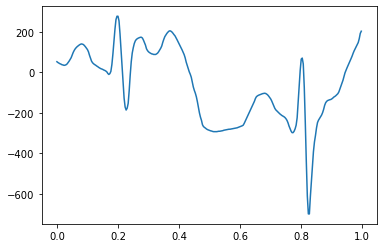

In [3]:
OFFSET = 100
LEN = 300
IDX = 4
signal = X_train.iloc[IDX].dropna().values[OFFSET:OFFSET+LEN]
plt.plot((np.arange(signal.shape[0])/SAMPLING_RATE), signal)

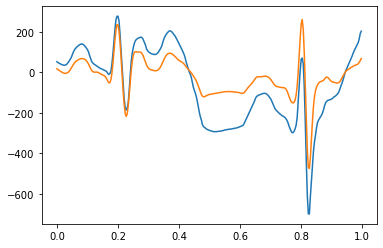

In [4]:
filtered_signal = filter_signal(signal=signal, ftype='FIR', band='bandpass',
        order=40, frequency=[3,45],
        sampling_rate=SAMPLING_RATE)[0]
    
plt.plot((np.arange(signal.shape[0])/SAMPLING_RATE), signal)
plt.plot((np.arange(signal.shape[0])/SAMPLING_RATE), filtered_signal)

In [5]:
def calculate_entropy_features(X):
    df = pd.DataFrame(index = X.index)
    df["binned_entropy"] = 0
    for i in tqdm(range(df.shape[0])):
        df["binned_entropy"].iloc[i] = binned_entropy(X.iloc[i].dropna(), 25)
    df["fourier_entropy"] = 0
    for i in tqdm(range(df.shape[0])):
        df["fourier_entropy"].iloc[i] = fourier_entropy(X.iloc[i].dropna(), 15)
    df["permutation_entropy"] = 0
    for i in tqdm(range(df.shape[0])):
        df["permutation_entropy"].iloc[i] = permutation_entropy(X.iloc[i].dropna(), 3, 10)
        
    return df

In [6]:
df_train = calculate_entropy_features(X_train)

100%|██████████| 5117/5117 [01:12<00:00, 71.04it/s]


In [7]:
df_test = calculate_entropy_features(X_test)

100%|██████████| 3411/3411 [00:44<00:00, 76.42it/s]


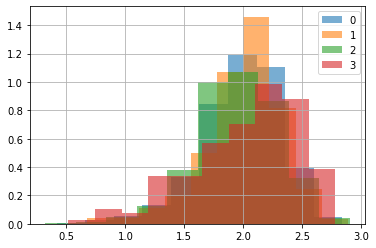

In [9]:
hist_statistic_per_class(df_train["binned_entropy"], y_train)

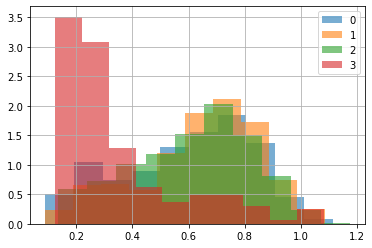

In [10]:
hist_statistic_per_class(df_train["fourier_entropy"], y_train)

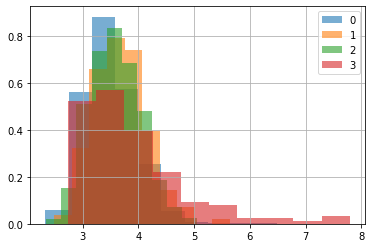

In [11]:
hist_statistic_per_class(df_train["permutation_entropy"], y_train)

In [12]:
df_train.to_csv("../data/entropy/flipped/X_train.csv", index_label="id")
df_test.to_csv("../data/entropy/flipped/X_test.csv", index_label="id")